In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/DATA 119/Project/BRFSS_21_SRS1.csv")

In [ ]:
columns_to_keep = ["SEXVAR","_EDUCAG","EMPLOY1","INCOME3","MARITAL","RENTHOM1","HHADULT","CHILDREN",\
                   "PHYSHLTH", "MENTHLTH", "WEIGHT2", "HEIGHT3","DIFFWALK","_SMOKER3", "_RFSMOK3", "ALCDAY5",\
                   "PRIMINSR", "CHECKUP1", "EXERANY2", "BPHIGH6", "TOLDHI3", "CVDINFR4",\
                   "CVDCRHD4", "CVDSTRK3", "ASTHMA3", "CHCOCNCR", "ADDEPEV3", "PREDIAB1", "DIABETE4","DIABAGE3","INSULIN1",\
                   "_VEGESU1", "_FRUTSU1","FRNCHDA_"]
data_quick = data[columns_to_keep]

#To drop columns, use: data_quick.drop([,], axis=1)

In [ ]:
data_quick = data_quick.dropna(subset=['HEIGHT3'])
data_quick['HEIGHT3'] = data_quick['HEIGHT3'].astype(str).str.replace('.0$', '')
data_quick['HEIGHT3']

<ipython-input-4-4207d27814bb>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_quick['HEIGHT3'] = data_quick['HEIGHT3'].astype(str).str.replace('.0$', '')
<ipython-input-4-4207d27814bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_quick['HEIGHT3'] = data_quick['HEIGHT3'].astype(str).str.replace('.0$', '')


0        504
1        503
2        507
3        503
4        508
        ... 
43865    508
43866    511
43867    507
43868    505
43869    510
Name: HEIGHT3, Length: 42531, dtype: object

In [ ]:
#separate ft and in
data_quick[['HEIGHT_ft', 'HEIGHT_in']] = data_quick['HEIGHT3'].apply(lambda x: pd.Series([int(str(x)[0]), int(str(x)[1:])]))
data_quick[["HEIGHT3",'HEIGHT_ft', "HEIGHT_in"]]

,HEIGHT3,HEIGHT_ft,HEIGHT_in
0,504,5,4
1,503,5,3
2,507,5,7
3,503,5,3
4,508,5,8
...,...,...,...
43865,508,5,8
43866,511,5,11
43867,507,5,7
43868,505,5,5


In [ ]:
#ft + in --> in
data_quick['HEIGHT_IN'] = data_quick['HEIGHT_in'] + (data_quick['HEIGHT_ft']*12)
#Compute BMI
data_quick['BMI']=(data_quick['WEIGHT2'] / (data_quick['HEIGHT_IN']**2)) * 703
data_quick['BMI'] = round(data_quick['BMI'], 2)
#Drop unnecessary columns
data_quick = data_quick.drop(['HEIGHT3','HEIGHT_ft','HEIGHT_in'],axis=1)
data_quick["BMI"]


0        23.34
1        27.45
2        22.71
3        18.24
4        30.41
         ...  
43865    24.33
43866    33.47
43867    18.79
43868    38.27
43869    27.26
Name: BMI, Length: 42531, dtype: float64

In [ ]:
#Demographics cleaning
data_quick['SEX'] = data_quick['SEXVAR'].replace({1.0: 'male', 2.0: 'female'})
data_quick['EDU'] = data_quick['_EDUCAG'].replace({1.0: 'none', 2.0: 'high school', 3.0:'college', 4.0: 'grad school', 9:'NaN'}).replace({'NaN': None})
data_quick['JOB'] = data_quick['EMPLOY1'].replace({1.0: 'employed', 2.0: 'self-employed', 3.0:'unemployed (>1 year)', 4.0: 'unemployed (<1 year)', 5.0:'homemaker', 6.0:'student', 7.0: 'retired', 8:'disabled', 9:'NaN'}).replace({'NaN': None})
data_quick['INCOME'] = data_quick['INCOME3'].replace({1.0: "< $25,000", 2.0: "< $25,000", 3.0:"< $25,000", 4.0: "< $25,000", 5.0:"$ 25,000 - 50,000", 6.0: "$ 25,000 - 50,000", 7.0: "$ 50,000 - 75,000", 8:"$ 75,000 - 100,000", 9:"$ 100,000 - 200,000", 10:"$ 100,000 - 200,000", 11:"> $200,000", 77: "NaN", 99:"NaN"}).replace({'NaN': None})
data_quick['MARITAL'] = data_quick['MARITAL'].replace({1.0: "married", 2.0: "divorced", 3.0:"widowed", 4.0: "separated", 5.0:"never married", 6.0: "cohabitating", 9:"NaN"}).replace({'NaN': None})
data_quick['HOME_OWNERSHIP'] = data_quick['RENTHOM1'].replace({1.0: "own", 2.0: "rent", 3.0:"NaN",7:"NaN",9:"NaN"}).replace({'NaN': None})
data_quick['NUM_ADULT'] = data_quick['HHADULT'].replace({77:None, 99:None}).replace({'NaN': None})
data_quick['NUM_CHILDREN'] = data_quick['CHILDREN'].replace({88:0, 99:"NaN"}).replace({'NaN': None})
data_quick[['SEX', "EDU", "JOB", "INCOME","MARITAL", "HOME_OWNERSHIP", "NUM_ADULT", "NUM_CHILDREN"]]

,SEX,EDU,JOB,INCOME,MARITAL,HOME_OWNERSHIP,NUM_ADULT,NUM_CHILDREN
0,female,college,retired,"$ 25,000 - 50,000",widowed,rent,1.0,0.0
1,female,college,employed,"< $25,000",married,own,5.0,2.0
2,female,grad school,self-employed,"$ 75,000 - 100,000",married,own,2.0,0.0
3,female,college,unemployed (>1 year),"< $25,000",married,own,2.0,0.0
4,male,college,retired,"$ 100,000 - 200,000",married,own,2.0,0.0
...,...,...,...,...,...,...,...,...
43865,male,grad school,employed,"$ 100,000 - 200,000",married,own,5.0,1.0
43866,male,college,employed,"$ 25,000 - 50,000",never married,own,2.0,5.0
43867,female,grad school,retired,"$ 25,000 - 50,000",None,own,2.0,0.0
43868,female,college,disabled,"< $25,000",married,own,NaN,1.0


In [ ]:
type(data_quick['CHILDREN'])

pandas.core.series.Series

In [ ]:
#Physical Health Data Cleaning
data_quick['PHY_HEALTH'] = data_quick['PHYSHLTH'].replace({88: 0, 99: 'NaN'}).replace({'NaN': None})
data_quick['INSURANCE'] = data_quick['PRIMINSR'].replace({88: "none", 1: "employer insurance", 2: "private insurance", 3: "Medicare", 4:"Medicare", 5:"Medicaid", 6:"other", 7:"other", 8:"other", 9:"other", 10:"other", 77:"NaN", 99: "NaN"}).replace({'NaN': None})
data_quick['CHECK_UP'] = data_quick['CHECKUP1'].replace({1: "<1 year", 2: "1 - 2 years", 3: "2 - 5 years", 4: "> 5 years", 8:"Never", 7:"NaN", 9:"NaN"}).replace({'NaN': None})
data_quick['EXERCISE'] = data_quick['EXERANY2'].replace({1: "yes", 2: "no", 7:"NaN", 9:"NaN"}).replace({'NaN': None})
data_quick['HIGH_BP'] = data_quick['BPHIGH6'].replace({1: "yes", 2: "NaN", 3:"no", 4:"yes",7:"NaN",9:"NaN"}).replace({'NaN': None})
data_quick['HIGH_CHOL'] = data_quick['TOLDHI3'].replace({1: "yes", 2: "no", 7:"NaN",9:"NaN"}).replace({'NaN': None})
data_quick['CVD'] = data_quick['CVDCRHD4'].replace({1: "yes", 2: "no", 7:"NaN",9:"NaN"}).replace({'NaN': None})
data_quick['HEART_ATTACK'] = data_quick['CVDINFR4'].replace({1: "yes", 2: "no", 7:"NaN",9:"NaN"}).replace({'NaN': None})
data_quick['STROKE'] = data_quick['CVDSTRK3'].replace({1: "yes", 2: "no", 7:"NaN",9:"NaN"}).replace({'NaN': None})
data_quick['ASTHMA'] = data_quick['ASTHMA3'].replace({1: "yes", 2: "no", 7:"NaN",9:"NaN"}).replace({'NaN': None})
data_quick['CANCER'] = data_quick['CHCOCNCR'].replace({1: "yes", 2: "no", 7:"NaN",9:"NaN"}).replace({'NaN': None})
data_quick['PRE_DIAB'] = data_quick['PREDIAB1'].replace({1: "yes", 2: "no", 3:"no", 7:"NaN",9:"NaN"}).replace({'NaN': None})
data_quick['DIAB'] = data_quick['DIABETE4'].replace({1: "yes", 2: "no", 3:"no",4:"borderline", 7:"NaN",9:"NaN"}).replace({'NaN': None})
data_quick['DIAB_AGE'] = data_quick['DIABAGE3'].replace({98:"NaN", 99:"NaN"}).replace({'NaN': None})
data_quick['INSULIN'] = data_quick['INSULIN1'].replace({1: "yes", 2: "no", 7:"NaN",9:"NaN"}).replace({'NaN': None})

data_quick[["PHY_HEALTH","INSURANCE", "CHECK_UP", "EXERCISE","HIGH_BP","HIGH_CHOL","CVD","HEART_ATTACK","STROKE","ASTHMA","CANCER","PRE_DIAB","DIAB","DIAB_AGE", "INSULIN"]]

,PHY_HEALTH,INSURANCE,CHECK_UP,EXERCISE,HIGH_BP,HIGH_CHOL,CVD,HEART_ATTACK,STROKE,ASTHMA,CANCER,PRE_DIAB,DIAB,DIAB_AGE,INSULIN
0,0.0,employer insurance,<1 year,yes,yes,no,no,no,no,no,no,NaN,yes,61.0,NaN
1,0.0,employer insurance,2 - 5 years,no,no,yes,no,no,no,no,no,no,no,NaN,NaN
2,0.0,employer insurance,<1 year,yes,no,yes,no,no,no,no,no,no,no,NaN,NaN
3,0.0,employer insurance,<1 year,yes,no,no,no,no,yes,no,no,NaN,yes,52.0,no
4,0.0,Medicare,<1 year,yes,yes,no,yes,yes,no,yes,no,NaN,yes,55.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43865,0.0,employer insurance,<1 year,yes,no,no,no,no,no,no,no,NaN,no,NaN,NaN
43866,0.0,other,<1 year,no,yes,no,no,no,no,no,no,no,no,NaN,NaN
43867,2.0,Medicare,<1 year,yes,no,no,no,no,no,no,no,NaN,no,NaN,NaN
43868,15.0,Medicare,<1 year,yes,yes,NaN,no,no,no,yes,no,no,no,NaN,NaN


In [ ]:
#Nutrition Data Cleaning + RESPONSE
data_quick['MEN_HEALTH'] = data_quick['MENTHLTH'].replace({88: 0, 77:"NaN", 99:"NaN"}).replace({'NaN': None})
data_quick['VEGGIE_DAY'] = round((data_quick['_VEGESU1']/100),0).replace({'NaN': None})
data_quick['FRUIT_DAY'] = round((data_quick['_FRUTSU1']/100),0).replace({'NaN': None})
data_quick['FRIES_DAY'] = round((data_quick['FRNCHDA_']/100),0).replace({'NaN': None})
data_quick[["MEN_HEALTH","VEGGIE_DAY", "FRUIT_DAY", "FRIES_DAY", "BMI"]]


,MEN_HEALTH,VEGGIE_DAY,FRUIT_DAY,FRIES_DAY,BMI
0,1.0,1.0,0.0,0.0,23.34
1,0.0,0.0,0.0,0.0,27.45
2,0.0,6.0,6.0,0.0,22.71
3,30.0,2.0,2.0,0.0,18.24
4,0.0,1.0,1.0,0.0,30.41
...,...,...,...,...,...
43865,0.0,2.0,1.0,0.0,24.33
43866,0.0,2.0,2.0,1.0,33.47
43867,0.0,6.0,0.0,0.0,18.79
43868,8.0,1.0,1.0,0.0,38.27


In [ ]:
new = data_quick[["MEN_HEALTH", "PHY_HEALTH", "BMI", "NUM_ADULT","NUM_CHILDREN", "VEGGIE_DAY", "FRUIT_DAY", "FRIES_DAY", "SEX","EDU",\
                  "JOB", "INCOME", "MARITAL", "HOME_OWNERSHIP", "INSURANCE", "CHECK_UP", "EXERCISE", "HIGH_BP", "CVD", "PRE_DIAB", "DIAB"]]

#Exclude all "NaN":
new = new.loc[(data_quick['BMI'] > 10) & (data_quick['BMI'] < 100)]
new = new.dropna(subset=["MEN_HEALTH", "PHY_HEALTH", "BMI", "NUM_ADULT","NUM_CHILDREN", "VEGGIE_DAY", "FRUIT_DAY", "FRIES_DAY", "SEX","EDU", "JOB", "INCOME", "MARITAL", "HOME_OWNERSHIP", "INSURANCE", "CHECK_UP", "EXERCISE", "HIGH_BP", "CVD", "PRE_DIAB", "DIAB"]).reset_index(drop=True)
print(new.isna().any())
print(new.shape)

#Convert all numeric vars to float
cols = ["MEN_HEALTH", "PHY_HEALTH", "BMI", "NUM_ADULT","NUM_CHILDREN", "VEGGIE_DAY", "FRUIT_DAY", "FRIES_DAY"]
new[cols] = new[cols].apply(pd.to_numeric, errors='coerce')

# print(new['MEN_HEALTH'].isna().sum())
# print(new['MEN_HEALTH'].isnull().sum())

MEN_HEALTH        False
PHY_HEALTH        False
BMI               False
NUM_ADULT         False
NUM_CHILDREN      False
VEGGIE_DAY        False
FRUIT_DAY         False
FRIES_DAY         False
SEX               False
EDU               False
JOB               False
INCOME            False
MARITAL           False
HOME_OWNERSHIP    False
INSURANCE         False
CHECK_UP          False
EXERCISE          False
HIGH_BP           False
CVD               False
PRE_DIAB          False
DIAB              False
dtype: bool
(5173, 21)


Text(0.5, -0.25, 'Source: Centers for Disease Control and Prevention (CDC). \n Behavioral Risk Factor Surveillance System Survey Data. Atlanta, Georgia 2021.')

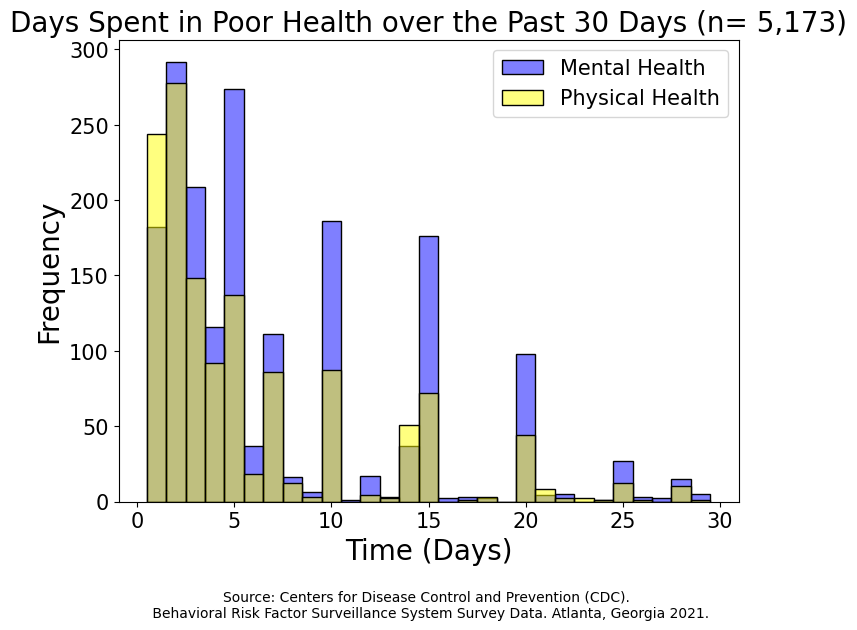

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Bar plot/Histogram: Distribution of Number of Days during which the Mental Health was poor.
### Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
plt.figure(figsize=(8, 6))
ax = sns.histplot(x='MEN_HEALTH', data=new, bins=(np.arange(0,30,1)+0.5), alpha = 0.5, color = "blue", label='Mental Health')
sns.histplot(x='PHY_HEALTH', data=new, bins=(np.arange(0,30,1)+0.5), alpha=0.5, color = "yellow", label = "Physical Health", ax=ax)
ax.set_title("Days Spent in Poor Health over the Past 30 Days (n= 5,173)", fontsize=20)
ax.set_xlabel("Time (Days)", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)
ax.tick_params(labelsize=15)
plt.legend(fontsize=15)
ax.text(x=0.5, y=-0.25, s="Source: Centers for Disease Control and Prevention (CDC). \n Behavioral Risk Factor Surveillance System Survey Data. Atlanta, Georgia 2021.", ha="center", transform=plt.gca().transAxes)

count    5173.000000
mean        4.239126
std         8.054090
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max        30.000000
Name: MEN_HEALTH, dtype: float64

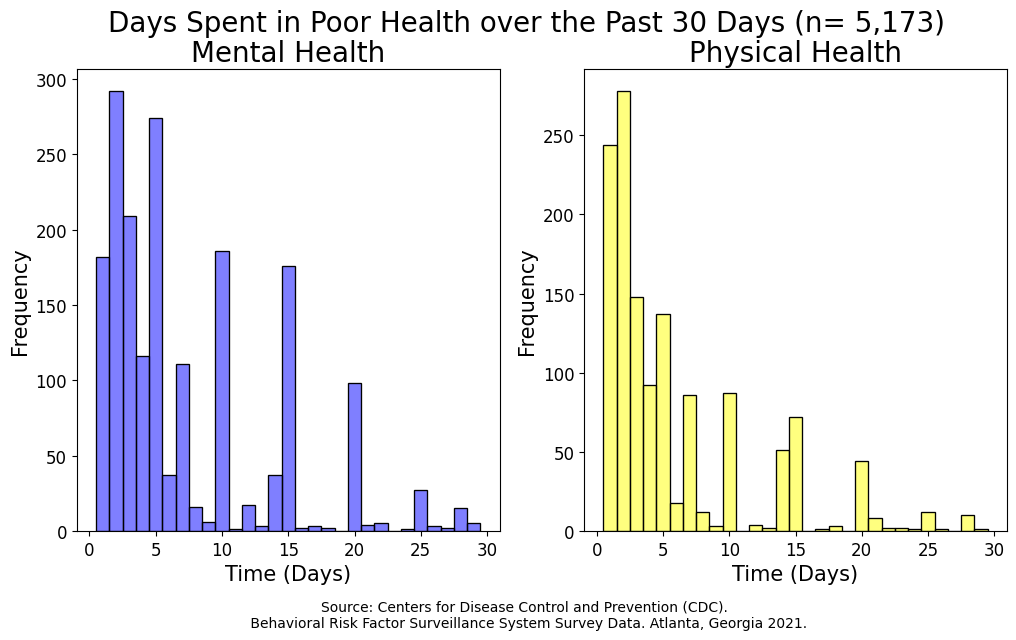

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mental Health
sns.histplot(x='MEN_HEALTH', data=new, bins=(np.arange(0,30,1)+0.5), alpha = 0.5, color = "blue", ax=axes[0])
axes[0].set_title("Mental Health", fontsize=20)
axes[0].set_xlabel("Time (Days)", fontsize=15)
axes[0].set_ylabel("Frequency", fontsize=15)
axes[0].tick_params(labelsize=12)

# Physical Health
sns.histplot(x='PHY_HEALTH', data=new, bins=(np.arange(0,30,1)+0.5), alpha=0.5, color = "yellow", ax=axes[1])
axes[1].set_title("Physical Health", fontsize=20)
axes[1].set_xlabel("Time (Days)", fontsize=15)
axes[1].set_ylabel("Frequency", fontsize=15)
axes[1].tick_params(labelsize=12)

fig.suptitle("Days Spent in Poor Health over the Past 30 Days (n= 5,173)", fontsize=20)
plt.figtext(0.5, -0.05, "Source: Centers for Disease Control and Prevention (CDC). \n Behavioral Risk Factor Surveillance System Survey Data. Atlanta, Georgia 2021.", ha="center")
plt.subplots

#Kristof: I kept both overlayed and separate, choose whichever you like more. I do understand that the overlayed graph is a bit harder
# to read but it is also easier to see the commonality in patterns.
new['MEN_HEALTH'].describe()


<ipython-input-14-ff96e99bc67a>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sex_edu = new.groupby(["EDU", "SEX"]).mean()["MEN_HEALTH"].reset_index()
<ipython-input-14-ff96e99bc67a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


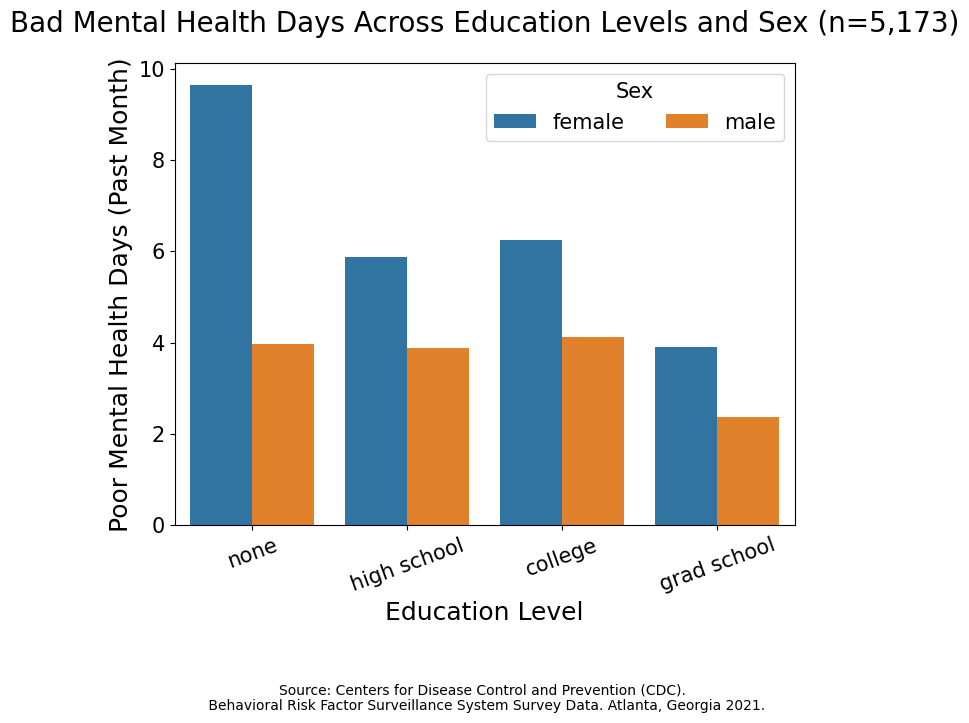

In [ ]:
#Bar chart

sex_edu = new.groupby(["EDU", "SEX"]).mean()["MEN_HEALTH"].reset_index()
sex_edu

EDU_order = ["none", "high school", "college", "grad school"]
sex_edu["EDU_order"] = pd.Categorical(sex_edu["EDU"], categories=EDU_order, ordered=True)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x="EDU_order", y="MEN_HEALTH", hue="SEX", data=sex_edu) #How can we add error bars to this graph?
ax.set_title("Bad Mental Health Days Across Education Levels and Sex (n=5,173)", y = 1.05, fontsize = 20)
ax.set_xlabel("Education Level", fontsize = 18)
ax.set_ylabel("Poor Mental Health Days (Past Month)", fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=20, va='top')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
ax.legend(title="Sex", fontsize=15, title_fontsize=15, ncol=2, loc="best")
ax.text(x=0.5, y=-0.4, s="Source: Centers for Disease Control and Prevention (CDC). \n Behavioral Risk Factor Surveillance System Survey Data. Atlanta, Georgia 2021.", ha="center", transform=plt.gca().transAxes)
plt.show()

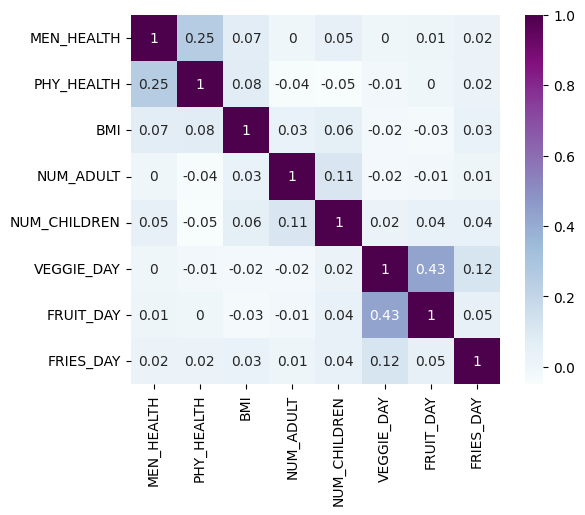

In [ ]:
#Correlation matrix for numeric variables
numeric = new[cols]
corr_matrix = numeric.corr().round(2)
sns.heatmap(corr_matrix, cmap='BuPu', annot=True, square=True)
plt.show()

In [ ]:
#Create dummies for categorical variables
new_dummy = pd.get_dummies(new[["SEX","EDU", "JOB", "INCOME", "MARITAL", "HOME_OWNERSHIP", "INSURANCE", "CHECK_UP", "EXERCISE", "HIGH_BP", "CVD", "PRE_DIAB", "DIAB"]])
new_dummy

,SEX_female,SEX_male,EDU_college,EDU_grad school,EDU_high school,EDU_none,JOB_disabled,JOB_employed,JOB_homemaker,JOB_retired,...,EXERCISE_no,EXERCISE_yes,HIGH_BP_no,HIGH_BP_yes,CVD_no,CVD_yes,PRE_DIAB_no,PRE_DIAB_yes,DIAB_borderline,DIAB_no
0,1,0,1,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1
1,1,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
2,0,1,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
3,1,0,0,1,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,0,1
4,1,0,1,0,0,0,0,1,0,0,...,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,0,1,0,1,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,0,1
5169,1,0,1,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,1,0,1
5170,0,1,1,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,1
5171,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1


In [ ]:
new_dummy.columns.tolist()

['SEX_female',
 'SEX_male',
 'EDU_college',
 'EDU_grad school',
 'EDU_high school',
 'EDU_none',
 'JOB_disabled',
 'JOB_employed',
 'JOB_homemaker',
 'JOB_retired',
 'JOB_self-employed',
 'JOB_student',
 'JOB_unemployed (<1 year)',
 'JOB_unemployed (>1 year)',
 'INCOME_$ 100,000 - 200,000',
 'INCOME_$ 25,000 - 50,000',
 'INCOME_$ 50,000 - 75,000',
 'INCOME_$ 75,000 - 100,000',
 'INCOME_< $25,000',
 'INCOME_> $200,000',
 'MARITAL_cohabitating',
 'MARITAL_divorced',
 'MARITAL_married',
 'MARITAL_never married',
 'MARITAL_separated',
 'MARITAL_widowed',
 'HOME_OWNERSHIP_own',
 'HOME_OWNERSHIP_rent',
 'INSURANCE_Medicaid',
 'INSURANCE_Medicare',
 'INSURANCE_employer insurance',
 'INSURANCE_none',
 'INSURANCE_other',
 'INSURANCE_private insurance',
 'CHECK_UP_1 - 2 years',
 'CHECK_UP_2 - 5 years',
 'CHECK_UP_<1 year',
 'CHECK_UP_> 5 years',
 'CHECK_UP_Never',
 'EXERCISE_no',
 'EXERCISE_yes',
 'HIGH_BP_no',
 'HIGH_BP_yes',
 'CVD_no',
 'CVD_yes',
 'PRE_DIAB_no',
 'PRE_DIAB_yes',
 'DIAB_border

In [ ]:
print(numeric.shape)
print(new_dummy.shape)
mental = pd.merge(numeric, new_dummy, left_index=True, right_index=True)
mental.columns.tolist()

(5173, 8)
(5173, 49)


['MEN_HEALTH',
 'PHY_HEALTH',
 'BMI',
 'NUM_ADULT',
 'NUM_CHILDREN',
 'VEGGIE_DAY',
 'FRUIT_DAY',
 'FRIES_DAY',
 'SEX_female',
 'SEX_male',
 'EDU_college',
 'EDU_grad school',
 'EDU_high school',
 'EDU_none',
 'JOB_disabled',
 'JOB_employed',
 'JOB_homemaker',
 'JOB_retired',
 'JOB_self-employed',
 'JOB_student',
 'JOB_unemployed (<1 year)',
 'JOB_unemployed (>1 year)',
 'INCOME_$ 100,000 - 200,000',
 'INCOME_$ 25,000 - 50,000',
 'INCOME_$ 50,000 - 75,000',
 'INCOME_$ 75,000 - 100,000',
 'INCOME_< $25,000',
 'INCOME_> $200,000',
 'MARITAL_cohabitating',
 'MARITAL_divorced',
 'MARITAL_married',
 'MARITAL_never married',
 'MARITAL_separated',
 'MARITAL_widowed',
 'HOME_OWNERSHIP_own',
 'HOME_OWNERSHIP_rent',
 'INSURANCE_Medicaid',
 'INSURANCE_Medicare',
 'INSURANCE_employer insurance',
 'INSURANCE_none',
 'INSURANCE_other',
 'INSURANCE_private insurance',
 'CHECK_UP_1 - 2 years',
 'CHECK_UP_2 - 5 years',
 'CHECK_UP_<1 year',
 'CHECK_UP_> 5 years',
 'CHECK_UP_Never',
 'EXERCISE_no',
 'EXE

In [ ]:
#Build a new BINARY variable MTH such that (0-5 days = GOOD MENTAL HEALTH) and (>5 days = POOR MENTAL HEALTH)
### 0 = GOOD MENTAL HEALTH, 1 = POOR MENTAL HEALTH
day_threshold = 5
mental['MTH'] = np.where(mental['MEN_HEALTH'] <= day_threshold, 0, 1)
mental

,MEN_HEALTH,PHY_HEALTH,BMI,NUM_ADULT,NUM_CHILDREN,VEGGIE_DAY,FRUIT_DAY,FRIES_DAY,SEX_female,SEX_male,...,EXERCISE_yes,HIGH_BP_no,HIGH_BP_yes,CVD_no,CVD_yes,PRE_DIAB_no,PRE_DIAB_yes,DIAB_borderline,DIAB_no,MTH
0,0.0,0.0,27.45,5.0,2.0,0.0,0.0,0.0,1,0,...,0,1,0,1,0,1,0,0,1,0
1,0.0,0.0,22.71,2.0,0.0,6.0,6.0,0.0,1,0,...,1,1,0,1,0,1,0,0,1,0
2,2.0,0.0,22.31,2.0,1.0,2.0,2.0,0.0,0,1,...,1,1,0,1,0,1,0,0,1,0
3,2.0,0.0,23.72,2.0,1.0,3.0,1.0,0.0,1,0,...,1,1,0,1,0,1,0,0,1,0
4,7.0,0.0,34.33,2.0,1.0,0.0,0.0,0.0,1,0,...,1,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,20.0,2.0,47.46,2.0,2.0,2.0,1.0,0.0,0,1,...,1,1,0,1,0,1,0,0,1,1
5169,0.0,1.0,38.41,3.0,0.0,2.0,2.0,0.0,1,0,...,1,0,1,1,0,0,1,0,1,0
5170,4.0,0.0,27.45,2.0,0.0,2.0,0.0,0.0,0,1,...,1,0,1,1,0,0,1,0,1,0
5171,3.0,1.0,28.46,2.0,1.0,3.0,1.0,0.0,0,1,...,1,1,0,1,0,1,0,0,1,0


In [ ]:
import statsmodels.api as sm


#Since I am using statsmodel, I do not need to standardize data (the package does it for me)
all_predictors = ['PHY_HEALTH','BMI','NUM_ADULT','NUM_CHILDREN','VEGGIE_DAY','FRUIT_DAY','FRIES_DAY','SEX_female','SEX_male','EDU_college',\
              'EDU_grad school','EDU_high school','EDU_none','JOB_disabled','JOB_employed','JOB_homemaker','JOB_retired','JOB_self-employed',\
              'JOB_student','JOB_unemployed (<1 year)','JOB_unemployed (>1 year)','INCOME_$ 100,000 - 200,000','INCOME_$ 25,000 - 50,000',\
              'INCOME_$ 50,000 - 75,000','INCOME_$ 75,000 - 100,000','INCOME_< $25,000','INCOME_> $200,000','MARITAL_cohabitating','MARITAL_divorced',\
              'MARITAL_married','MARITAL_never married','MARITAL_separated','MARITAL_widowed','HOME_OWNERSHIP_own','HOME_OWNERSHIP_rent',\
              'INSURANCE_Medicaid','INSURANCE_Medicare','INSURANCE_employer insurance','INSURANCE_none','INSURANCE_other',\
              'INSURANCE_private insurance','CHECK_UP_1 - 2 years','CHECK_UP_2 - 5 years','CHECK_UP_<1 year','CHECK_UP_> 5 years',\
              'CHECK_UP_Never','EXERCISE_no','EXERCISE_yes','HIGH_BP_no','HIGH_BP_yes','CVD_no','CVD_yes','PRE_DIAB_no','PRE_DIAB_yes',\
              'DIAB_borderline','DIAB_no']
predictors = ['PHY_HEALTH','BMI','NUM_ADULT','NUM_CHILDREN','VEGGIE_DAY','FRUIT_DAY','FRIES_DAY','SEX_female',\
              'EDU_grad school','EDU_high school','EDU_none','JOB_disabled','JOB_homemaker','JOB_retired','JOB_self-employed',\
              'JOB_student','JOB_unemployed (<1 year)','JOB_unemployed (>1 year)','MARITAL_cohabitating','MARITAL_divorced',\
              'MARITAL_married','MARITAL_separated','MARITAL_widowed','HOME_OWNERSHIP_own',\
              'INSURANCE_Medicaid','INSURANCE_Medicare','INSURANCE_none','INSURANCE_other',\
              'INSURANCE_private insurance','CHECK_UP_1 - 2 years','CHECK_UP_2 - 5 years','CHECK_UP_> 5 years',\
              'CHECK_UP_Never','EXERCISE_yes','HIGH_BP_yes','CVD_yes','PRE_DIAB_yes',\
              'DIAB_borderline']
references = ['SEX_male','EDU_college','JOB_employed','MARITAL_never married','HOME_OWNERSHIP_rent',\
              'INSURANCE_employer insurance','CHECK_UP_<1 year','EXERCISE_no','HIGH_BP_no','CVD_no','PRE_DIAB_no', 'DIAB_no']
response = ['MEN_HEALTH'] #Not predicting the binary variable MTH
X = mental[predictors]
y = mental['MEN_HEALTH']

# add constant term to predictor variables
X = sm.add_constant(X)
# fit multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             MEN_HEALTH   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     26.43
Date:                Thu, 11 May 2023   Prob (F-statistic):          1.78e-168
Time:                        21:34:32   Log-Likelihood:                -17669.
No. Observations:                5173   AIC:                         3.542e+04
Df Residuals:                    5134   BIC:                         3.567e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# repeat until all predictors have p-values less than 0.05
while model.pvalues[1:].max() > 0.05:
    max_p_idx = model.pvalues[1:].idxmax()
    X = X.drop(max_p_idx, axis=1)
    model = sm.OLS(y, X).fit()
# print final model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             MEN_HEALTH   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     54.07
Date:                Thu, 11 May 2023   Prob (F-statistic):          5.35e-178
Time:                        21:34:44   Log-Likelihood:                -17684.
No. Observations:                5173   AIC:                         3.541e+04
Df Residuals:                    5154   BIC:                         3.553e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

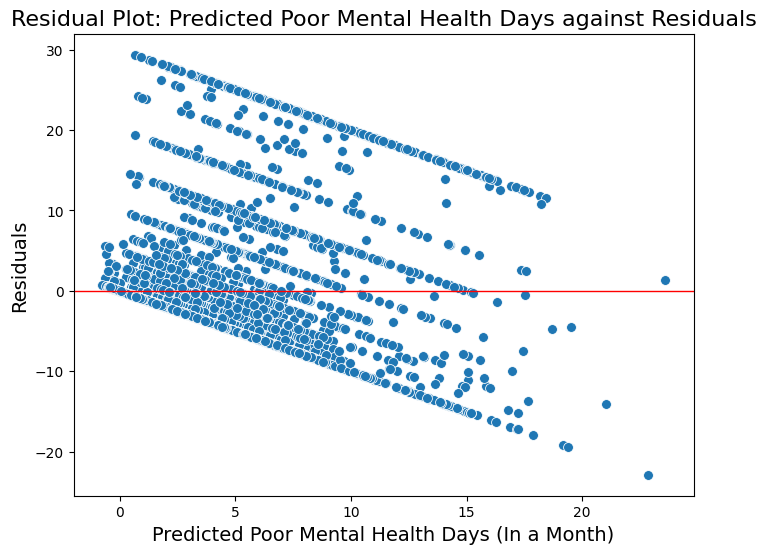

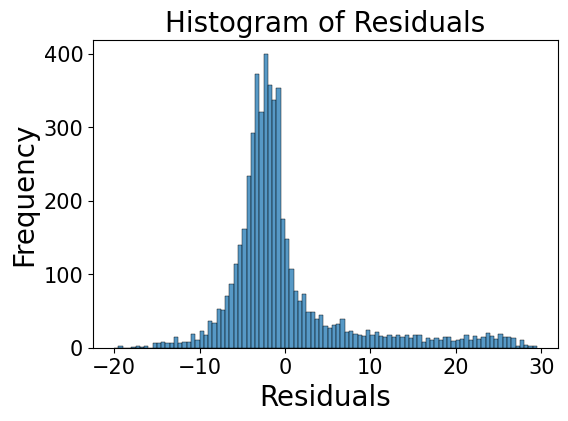

In [ ]:
#Verify whether linear regression is appropriate
predicted = model.predict(X)
residuals = model.resid

# Plot residuals vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=predicted, y=residuals, s=50)
plt.xlabel('Predicted Poor Mental Health Days (In a Month)', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot: Predicted Poor Mental Health Days against Residuals', fontsize=16)
plt.axhline(y=0, color='red', linestyle='-', linewidth = 1)
plt.show()

#Histogram of residuals
plt.figure(figsize=(6,4))
ax = sns.histplot(x=residuals, bins=np.arange(-20,30,0.5))
ax.set_title("Histogram of Residuals", fontsize=20)
ax.set_xlabel("Residuals", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)
ax.tick_params(labelsize=15)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_results = pd.DataFrame({'Predictor': X.columns, 'VIF': vif})
vif_results

#No evidence of strong multi-colinearity.

,Predictor,VIF
0,const,36.991935
1,PHY_HEALTH,1.122062
2,BMI,1.043506
3,NUM_CHILDREN,1.130892
4,SEX_female,1.037588
5,EDU_grad school,1.403180
6,EDU_high school,1.312991
7,JOB_disabled,1.168288
8,JOB_student,1.036438
9,JOB_unemployed (<1 year),1.032868


In [ ]:
#LASSO: Predicting "MEN_HEALTH" from both continuous/discrete/binary variables
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# split the data into training and test sets with test_size of 30%
# X = mental.drop('MEN_HEALTH', axis=1) #We are predicting MEN_HEALTH from all other variables.
# X = X.drop('MTH', axis =1)
# y = mental['MEN_HEALTH']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
# print("Number of rows in the test set:", len(X_test))

predictors = ['PHY_HEALTH','BMI','NUM_ADULT','NUM_CHILDREN','VEGGIE_DAY','FRUIT_DAY','FRIES_DAY','SEX_female',\
              'EDU_grad school','EDU_high school','EDU_none','JOB_disabled','JOB_homemaker','JOB_retired','JOB_self-employed',\
              'JOB_student','JOB_unemployed (<1 year)','JOB_unemployed (>1 year)','MARITAL_cohabitating','MARITAL_divorced',\
              'MARITAL_married','MARITAL_separated','MARITAL_widowed','HOME_OWNERSHIP_own',\
              'INSURANCE_Medicaid','INSURANCE_Medicare','INSURANCE_none','INSURANCE_other',\
              'INSURANCE_private insurance','CHECK_UP_1 - 2 years','CHECK_UP_2 - 5 years','CHECK_UP_> 5 years',\
              'CHECK_UP_Never','EXERCISE_yes','HIGH_BP_yes','CVD_yes','PRE_DIAB_yes',\
              'DIAB_borderline']
references = ['SEX_male','EDU_college','JOB_employed','MARITAL_never married','HOME_OWNERSHIP_rent',\
              'INSURANCE_employer insurance','CHECK_UP_<1 year','EXERCISE_no','HIGH_BP_no','CVD_no','PRE_DIAB_no', 'DIAB_no']
X = mental[predictors]
y = mental['MEN_HEALTH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print("Number of rows in the test set:", len(X_test))

Number of rows in the test set: 1552


In [ ]:
# Standardize continuous predictor variables
scaler = StandardScaler()
X_train_cont = scaler.fit_transform(X_train[['PHY_HEALTH','BMI','NUM_ADULT','NUM_CHILDREN','VEGGIE_DAY','FRUIT_DAY','FRIES_DAY']])
X_test_cont = scaler.transform(X_test[['PHY_HEALTH','BMI','NUM_ADULT','NUM_CHILDREN','VEGGIE_DAY','FRUIT_DAY','FRIES_DAY']])

# Combine standardized continuous variables and binary variables
X_train = np.concatenate((X_train_cont, X_train.drop(['PHY_HEALTH','BMI','NUM_ADULT','NUM_CHILDREN','VEGGIE_DAY','FRUIT_DAY','FRIES_DAY'], axis=1)), axis=1)
X_test = np.concatenate((X_test_cont, X_test.drop(['PHY_HEALTH','BMI','NUM_ADULT','NUM_CHILDREN','VEGGIE_DAY','FRUIT_DAY','FRIES_DAY'], axis=1)), axis=1)

# Fit Lasso linear regression model using LassoCV with cross-validation to choose alpha
lasso_cv = LassoCV(cv=10, n_alphas=1000, random_state=68)
lasso_cv.fit(X_train, y_train)

# Get the best alpha and print it
alpha = lasso_cv.alpha_
print('Best alpha:', alpha)

# Fit Lasso linear regression model using the best alpha
lasso = Lasso(alpha=alpha, max_iter=10000) # adjust alpha value as needed to balance between overfitting and underfitting
lasso.fit(X_train, y_train)

# Print model coefficients and intercept
print('Model Intercept:', lasso.intercept_)
coefficients = pd.DataFrame({'Predictor Variable':predictors, 'Coefficient': lasso.coef_})
coefficients


Best alpha: 0.05710778692047347
Model Intercept: 6.849191650763825


,Predictor Variable,Coefficient
0,PHY_HEALTH,1.429036
1,BMI,0.101163
2,NUM_ADULT,0.225383
3,NUM_CHILDREN,0.436195
4,VEGGIE_DAY,0.000000
5,FRUIT_DAY,-0.000000
6,FRIES_DAY,0.000000
7,SEX_female,1.442104
8,EDU_grad school,-0.611601
9,EDU_high school,-0.507118


In [ ]:
# Loop method for visualization
alphas = np.arange(0.001,1.25, 0.001)

coeff = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    coeff.append(lasso.coef_)
result = pd.DataFrame({
    'Alphas':alphas,
    'Coeffs':coeff
})
result

,Alphas,Coeffs
0,0.001,"[1.4024078718384685, 0.10130967391314695, 0.24..."
1,0.002,"[1.4026554353549192, 0.10085204976139897, 0.24..."
2,0.003,"[1.4028911120066438, 0.10040089785490873, 0.24..."
3,0.004,"[1.4031427148592597, 0.0999411587187685, 0.245..."
4,0.005,"[1.4033771214479522, 0.09949072980393119, 0.24..."
...,...,...
1244,1.245,"[0.6439255888629289, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1245,1.246,"[0.6429255888629289, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1246,1.247,"[0.6419255888629289, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1247,1.248,"[0.6409255888629288, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
# create a new dataframe with separate columns for each coefficient
coeff_df = result.apply(lambda row: pd.Series(row['Coeffs']), axis=1)
coeff_df.columns = X.columns
coeff_df['Alphas'] = result['Alphas']
coeff_df.set_index('Alphas', inplace=True)
coeff_df

,PHY_HEALTH,BMI,NUM_ADULT,NUM_CHILDREN,VEGGIE_DAY,FRUIT_DAY,FRIES_DAY,SEX_female,EDU_grad school,EDU_high school,...,INSURANCE_private insurance,CHECK_UP_1 - 2 years,CHECK_UP_2 - 5 years,CHECK_UP_> 5 years,CHECK_UP_Never,EXERCISE_yes,HIGH_BP_yes,CVD_yes,PRE_DIAB_yes,DIAB_borderline
Alphas,,,,,,,,,,,,,,,,,,,,,
0.001,1.402408,0.101310,0.243534,0.460377,0.038457,-0.051780,0.027585,1.700490,-0.910293,-1.303205,...,-0.790104,1.025891,0.766185,1.177066,3.099084,-1.579511,0.493969,-1.188706,-0.107675,0.385902
0.002,1.402655,0.100852,0.244197,0.459982,0.036350,-0.049265,0.026762,1.695387,-0.901660,-1.283988,...,-0.771461,1.011268,0.741483,1.151241,2.885054,-1.570673,0.479910,-1.150529,-0.087930,0.319024
0.003,1.402891,0.100401,0.244866,0.459608,0.034244,-0.046754,0.025940,1.690272,-0.893034,-1.264780,...,-0.752882,0.996644,0.716776,1.125415,2.671006,-1.561844,0.465847,-1.112373,-0.068191,0.252129
0.004,1.403143,0.099941,0.245526,0.459207,0.032138,-0.044237,0.025116,1.685172,-0.884400,-1.245561,...,-0.734219,0.982021,0.692077,1.099591,2.456982,-1.553004,0.451789,-1.074190,-0.048444,0.185255
0.005,1.403377,0.099491,0.246196,0.458835,0.030032,-0.041726,0.024295,1.680057,-0.875774,-1.226354,...,-0.715647,0.967396,0.667370,1.073765,2.242932,-1.544176,0.437725,-1.036036,-0.028706,0.118359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.245,0.643926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,...,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000
1.246,0.642926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,...,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000
1.247,0.641926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,...,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000


In [ ]:
coeff_df.loc[0.070]

PHY_HEALTH                     1.438683
BMI                            0.095388
NUM_ADULT                      0.211503
NUM_CHILDREN                   0.436261
VEGGIE_DAY                     0.000000
FRUIT_DAY                      0.000000
FRIES_DAY                      0.000000
SEX_female                     1.396453
EDU_grad school               -0.555143
EDU_high school               -0.354603
EDU_none                       0.000000
JOB_disabled                   3.279535
JOB_homemaker                  0.000000
JOB_retired                   -0.585113
JOB_self-employed             -0.000000
JOB_student                    0.000000
JOB_unemployed (<1 year)       0.000000
JOB_unemployed (>1 year)       0.000000
MARITAL_cohabitating           0.000000
MARITAL_divorced               0.000000
MARITAL_married               -1.177770
MARITAL_separated             -0.000000
MARITAL_widowed               -0.000000
HOME_OWNERSHIP_own            -1.742028
INSURANCE_Medicaid             0.442430


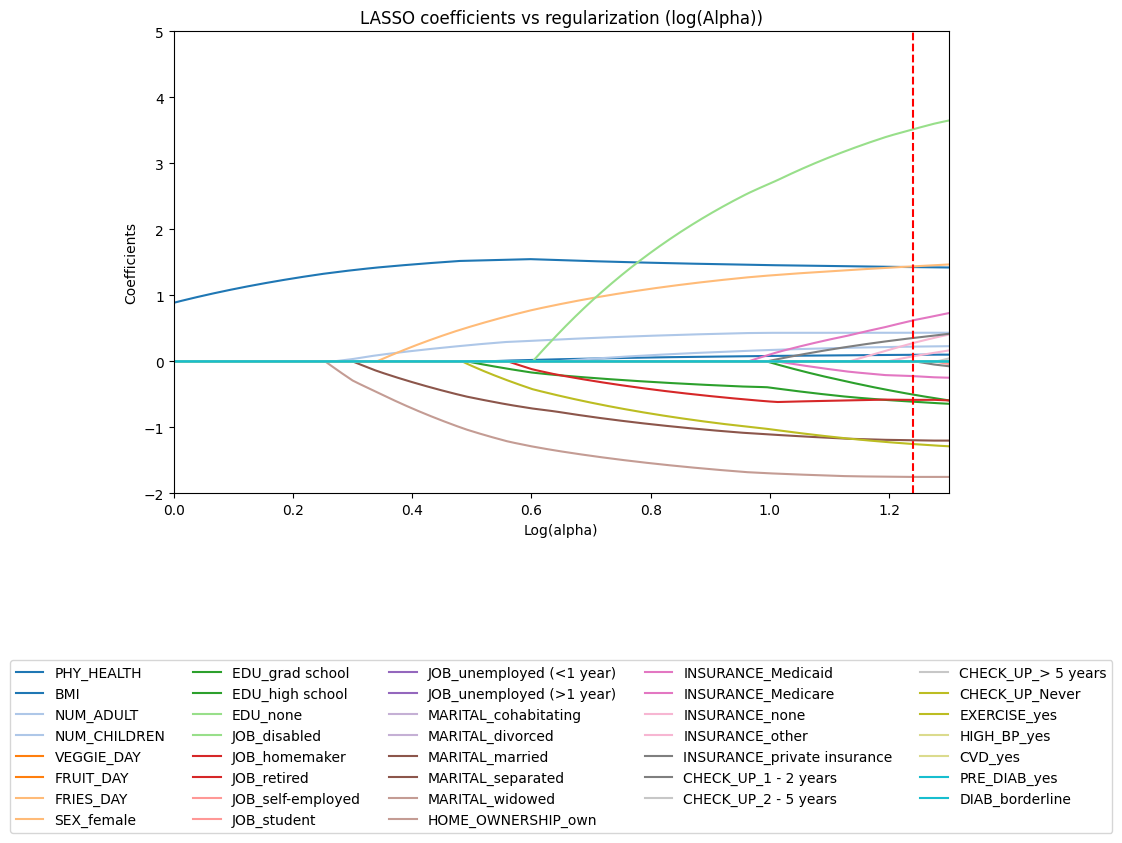

In [ ]:
# Plot the coefficients against the logarithm of the threshold (=alpha)
plt.figure(figsize=(10, 6))
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.tab20(np.linspace(0,2.5,100))))
plt.plot(np.log10(1/alphas), coeff)
plt.xlabel('Log(alpha)')
plt.ylabel('Coefficients')
plt.ylim([-2,5])
plt.xlim([0, 1.3])
plt.title('LASSO coefficients vs regularization (log(Alpha))')
plt.axvline(x=1.24, color='red', linestyle='--')
plt.legend(X.columns, loc='lower center', bbox_to_anchor=(0.5, -0.75), ncol=5)
plt.show()

In [ ]:
#Performance
from sklearn.metrics import mean_squared_error
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Test MSE:', mse)

Test MSE: 60.80681163734711


In [ ]:
#LASSO: predicting BINARY "MTH" from both continuous and binary variables.
# X = mental.drop('MTH', axis=1) #We are predicting MTH from all other variables.
# X = X.drop('MEN_HEALTH', axis =1)
# y = mental['MTH']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
# print("Number of rows in the test set:", len(X_test))

X = mental[predictors]
y = mental['MTH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print("Number of rows in the test set:", len(X_test))

Number of rows in the test set: 1552


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
# Standardize + Combine Continuous & Binary predictors
scaler = StandardScaler()
X_train_cont = scaler.fit_transform(X_train[['PHY_HEALTH','BMI','NUM_ADULT','NUM_CHILDREN','VEGGIE_DAY','FRUIT_DAY','FRIES_DAY']])
X_test_cont = scaler.transform(X_test[['PHY_HEALTH','BMI','NUM_ADULT','NUM_CHILDREN','VEGGIE_DAY','FRUIT_DAY','FRIES_DAY']])
X_train = np.concatenate((X_train_cont, X_train.drop(['PHY_HEALTH','BMI','NUM_ADULT','NUM_CHILDREN','VEGGIE_DAY','FRUIT_DAY','FRIES_DAY'], axis=1)), axis=1)
X_test = np.concatenate((X_test_cont, X_test.drop(['PHY_HEALTH','BMI','NUM_ADULT','NUM_CHILDREN','VEGGIE_DAY','FRUIT_DAY','FRIES_DAY'], axis=1)), axis=1)

# Fit LogisticRegressionCV (using cross-validation to choose alpha)
logistic_lasso_cv = LogisticRegressionCV(Cs=10, penalty='l1', cv=10, solver='liblinear', random_state=68)
logistic_lasso_cv.fit(X_train, y_train)

# Get the best alpha and print it
alpha = logistic_lasso_cv.C_[0]
print('Best alpha:', alpha)

# Fit logistic Lasso regression model using the best alpha
logistic_lasso = LogisticRegression(penalty='l1', C=alpha, solver='liblinear')
logistic_lasso.fit(X_train, y_train)

# Print model coefficients and intercept
print('Model Intercept:', logistic_lasso.intercept_)
coefficients = pd.DataFrame({'Predictor Variable': predictors, 'Coefficient': logistic_lasso.coef_[0]})
coefficients


Best alpha: 0.046415888336127774
Model Intercept: [-0.40365426]


,Predictor Variable,Coefficient
0,PHY_HEALTH,0.327538
1,BMI,0.000000
2,NUM_ADULT,0.059799
3,NUM_CHILDREN,0.100242
4,VEGGIE_DAY,0.000000
5,FRUIT_DAY,0.000000
6,FRIES_DAY,0.000000
7,SEX_female,0.311708
8,EDU_grad school,-0.084645
9,EDU_high school,-0.011196


In [ ]:
# Loop method for visualization
alphas = np.arange(0.001,0.5, 0.001)
results = []
coeff = []
for alpha in alphas:
    logistic_lasso = LogisticRegression(penalty='l1', C=alpha, solver='liblinear')
    logistic_lasso.fit(X_train, y_train)
    coeff.append(logistic_lasso.coef_[0])
    result = {
        'alpha': alpha,
        'non_zero_coeffs': np.count_nonzero(logistic_lasso.coef_),
        'train_acc': logistic_lasso.score(X_train, y_train),
        'test_acc': logistic_lasso.score(X_test, y_test)}
    results.append(result)
df_results = pd.DataFrame(results)
df_results

,alpha,non_zero_coeffs,train_acc,test_acc
0,0.001,0,0.794532,0.807345
1,0.002,0,0.794532,0.807345
2,0.003,2,0.794532,0.807345
3,0.004,3,0.794532,0.807345
4,0.005,3,0.794256,0.807990
...,...,...,...,...
494,0.495,35,0.804198,0.816366
495,0.496,35,0.804198,0.816366
496,0.497,35,0.804198,0.817010
497,0.498,35,0.804198,0.817010


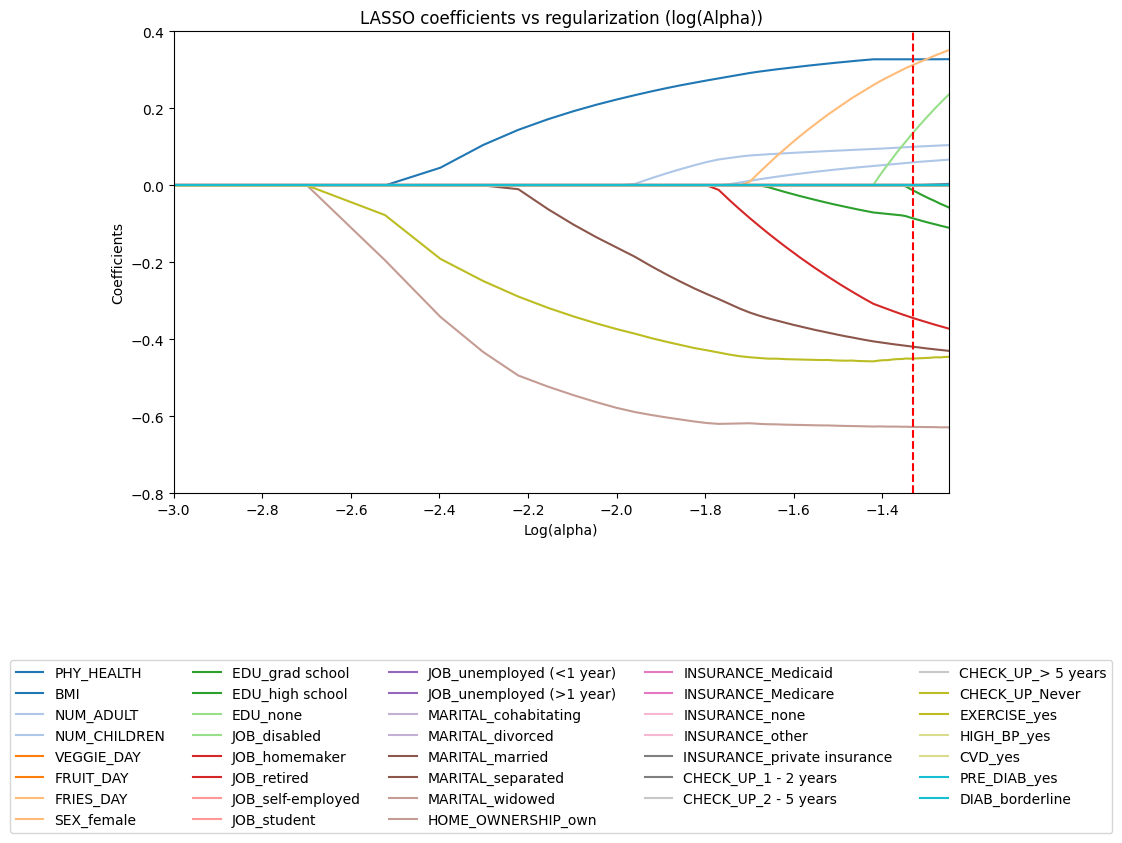

In [ ]:
# Plot the coefficients against the logarithm of the threshold (=alpha)
plt.figure(figsize=(10, 6))
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.tab20(np.linspace(0,2.5,100))))
plt.plot(np.log10(alphas), coeff)
plt.xlabel('Log(alpha)')
plt.ylabel('Coefficients')
plt.ylim([-0.8,0.4])
plt.xlim([-3, -1.25])
plt.title('LASSO coefficients vs regularization (log(Alpha))')
plt.axvline(x=-1.33, color='red', linestyle='--') #Kristof: Note that the CV gave us best alpha of (-1.33) but the loop gave us the best al[ha of (-1.92)
plt.legend(X.columns, loc='lower center', bbox_to_anchor=(0.5, -0.75), ncol=5)
plt.show()

In [ ]:
#Performance
from sklearn.metrics import mean_squared_error
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Test MSE:', mse)

Test MSE: 17.182875733944428


In [ ]:
#Restrospectively verify whether the best alpha is 0.0464
from sklearn.metrics import roc_auc_score, roc_curve
auc_scores = []
for a in alphas:
    model = Lasso(alpha=a)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    auc_scores.append(auc)
df_auc = pd.DataFrame({'alpha': alphas, 'AUC': auc_scores})
print(df_auc.loc[df_auc['AUC'].idxmax()])
df_auc

alpha    0.001000
AUC      0.766973
Name: 0, dtype: float64


,alpha,AUC
0,0.001,0.766973
1,0.002,0.766610
2,0.003,0.764848
3,0.004,0.764365
4,0.005,0.764389
...,...,...
494,0.495,0.500000
495,0.496,0.500000
496,0.497,0.500000
497,0.498,0.500000


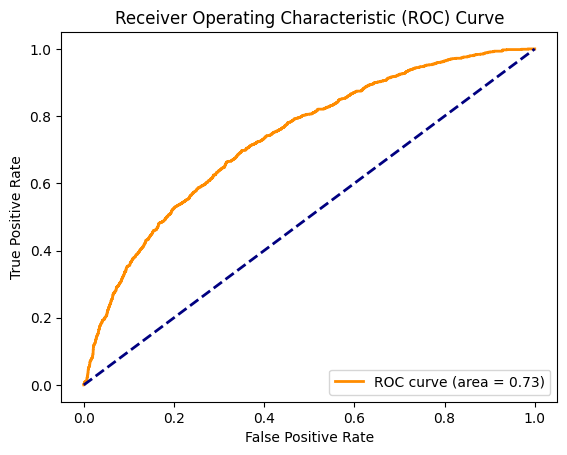

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train the best Lasso model on the entire dataset
best_model = Lasso(alpha=0.012)
best_model.fit(X, y)
y_pred = best_model.predict(X)

# Compute false positive rate, true positive rate, and threshold values for ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
